# Распараллеливание квадратурной формулы. Число pi
Железо:
-Компьютер-
Процессор		: Intel(R) Core(TM) i3-2100 CPU @ 3.10GHz
Память		: 4021 Мб (3213 Мб занято)
Тип машины		: Настольный компьютер
Операционная система		: Linux Lite 4.6
Пользователь		: main (main)
Дата/время		: Чт 06 мая 2021 13:16:27
-Дисплей-
Разрешение		: 3360x1080 пикселей
Рендер OpenGL		: GeForce GT 440/PCIe/SSE2
Поставщик X11		: The X.Org Foundation
-Аудио устройства-
Звуковая карта		: HDA-Intel - HDA Intel PCH
Звуковая карта		: HDA-Intel - HDA NVidia

Исходный код программы формулы средних прямоугольников:
```Cpp
#include <mpi.h>
#include <stdio.h>

#define PI 3.14159265358

double f(double x) { return 1 / (1 + x * x); }

int main(int argc, char *argv[]) {
  double pi, sum = 0, term, h, t1, t2, dt;
  int myrank, nprocs, n, i;
  MPI_Init(&argc, &argv);
  MPI_Comm_rank(MPI_COMM_WORLD, &myrank);
  MPI_Comm_size(MPI_COMM_WORLD, &nprocs);
  if (myrank == 0) {
    printf("Number of iterations=");
    scanf("%d", &n);
  }
  t1 = MPI_Wtime();
  MPI_Bcast(&n, 1, MPI_INT, 0, MPI_COMM_WORLD);
  h = 1.0 / n;
  for (i = myrank + 1; i <= n; i += nprocs) {sum += f(h * (i - 0.5));}
  term = 4 * h * sum;
  MPI_Reduce(&term, &pi, 1, MPI_DOUBLE, MPI_SUM, 0, MPI_COMM_WORLD);
  t2 = MPI_Wtime();
  if (myrank == 0)
    printf("Pi = %lf\nComputed fault of pi = %lf\nTime: %f\n", pi, pi - PI,
           t2 - t1);
  MPI_Finalize();
  return 0;
}
```

Исходный код программы формулы трапеций:
```Cpp
#include <mpi.h>
#include <stdio.h>

#define PI 3.14159265358

double f(double x) { return 1 / (1 + x * x); }

int main(int argc, char *argv[]) {
  double pi, sum = 0, term, h, t1, t2, dt;
  int myrank, nprocs, n, i;
  MPI_Init(&argc, &argv);
  MPI_Comm_rank(MPI_COMM_WORLD, &myrank);
  MPI_Comm_size(MPI_COMM_WORLD, &nprocs);
  if (myrank == 0) {
    printf("Number of iterations=");
    scanf("%d", &n);
  }
  t1 = MPI_Wtime();
  MPI_Bcast(&n, 1, MPI_INT, 0, MPI_COMM_WORLD);
  h = 1.0 / n;
  for (i = myrank + 1; i <= n; i += nprocs) {
    sum += f(h * i);
  }
  term = 4 * h * (((f(0) - f(1))/2) + sum);
  MPI_Reduce(&term, &pi, 1, MPI_DOUBLE, MPI_SUM, 0, MPI_COMM_WORLD);
  t2 = MPI_Wtime();
  if (myrank == 0)
    printf("Pi = %lf\nComputed fault of pi = %lf\nTime: %f\n", pi, pi - PI,
           t2 - t1);
  MPI_Finalize();
  return 0;
}
```

Исходный код программы формулы Симпсона:
```Cpp
#include <mpi.h>
#include <stdio.h>

#define PI 3.14159265358

double f(double x) { return 1 / (1 + x * x); }

int main(int argc, char *argv[]) {
  double pi, sum1 = 0, sum2 = 0, term, h, t1, t2, dt;
  int myrank, nprocs, n, i;
  MPI_Init(&argc, &argv);
  MPI_Comm_rank(MPI_COMM_WORLD, &myrank);
  MPI_Comm_size(MPI_COMM_WORLD, &nprocs);
  if (myrank == 0) {
    printf("Number of iterations=");
    scanf("%d", &n);
  }
  t1 = MPI_Wtime();
  MPI_Bcast(&n, 1, MPI_INT, 0, MPI_COMM_WORLD);
  h = 1.0 / n;
  for (i = myrank + 1; i <= n; i += nprocs) {
    sum1 += f(h * i);
  }
  for (i = myrank + 1; i <= n; i += nprocs) {
    sum2 = sum2 + f((i - 1/2)*h);
  }
  term = ((4 * h) / 3) * (((f(0) - f(1)) / 2) + 2 * sum2 + sum1);
  MPI_Reduce(&term, &pi, 1, MPI_DOUBLE, MPI_SUM, 0, MPI_COMM_WORLD);
  t2 = MPI_Wtime();
  if (myrank == 0)
    printf("Pi = %lf\nComputed fault of pi = %lf\nTime: %f\n", pi, pi - PI,
           t2 - t1);
  MPI_Finalize();
  return 0;
}
```

## Результаты работы программ
### Запуск на 2 процессах

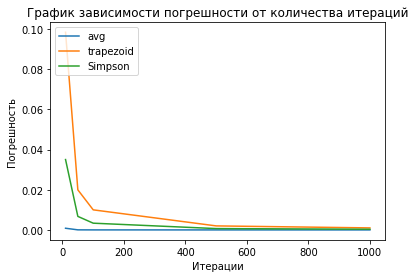

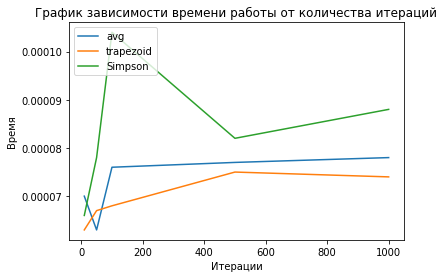

In [6]:
import numpy as np
import matplotlib.pyplot as plt

avg_fault = [0.000833,
0.000033,
0.000008,
0.000000,
0.000000,
]
avg_time = [0.000070,
0.000063,
0.000076,
0.000077,
0.000078,
]

trap_fault = [0.098333,
0.019933,
0.009983,
0.001999,
0.001000,
]
trap_time = [0.000063,
0.000067,
0.000068,
0.000075,
0.000074,
]

simpson_fault = [0.035000,
0.006733,
0.003350,
0.000667,
0.000333,
]
simpson_time = [0.000066,
0.000078,
0.000104,
0.000082,
0.000088,
]

x = [10, 50, 100, 500, 1000]
methods = ["avg", "trapezoid", "Simpson"]

plt.plot(x, avg_fault, x, trap_fault, x, simpson_fault)
plt.title('График зависимости погрешности от количества итераций')
plt.legend(methods,loc='upper left')
plt.ylabel('Погрешность')
plt.xlabel('Итерации')
plt.show()

plt.plot(x, avg_time, x, trap_time, x, simpson_time)
plt.title('График зависимости времени работы от количества итераций')
plt.legend(methods,loc='upper left')
plt.ylabel('Время')
plt.xlabel('Итерации')
plt.show()




### Запуск на 4 процессах

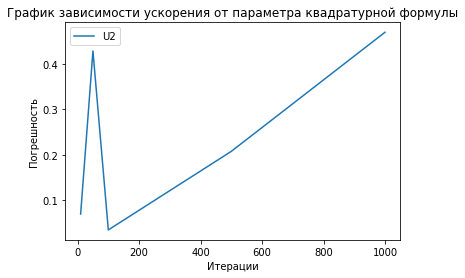

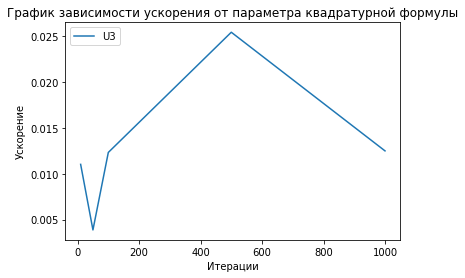

In [5]:
import numpy as np
import matplotlib.pyplot as plt

boost_u2 = [0.06951,
0.42857,
0.03456,
0.20755,
0.46988,
]
boost_u3 = [0.01102,
0.00387,
0.01232,
0.02543,
0.01249,
]

x = [10, 50, 100, 500, 1000]

plt.plot(x, boost_u2)
plt.title('График зависимости ускорения от параметра квадратурной формулы')
plt.legend(["U2"],loc='upper left')
plt.ylabel('Погрешность')
plt.xlabel('Итерации')
plt.show()

plt.plot(x, boost_u3)
plt.title('График зависимости ускорения от параметра квадратурной формулы')
plt.legend(["U3"],loc='upper left')
plt.ylabel('Ускорение')
plt.xlabel('Итерации')
plt.show()

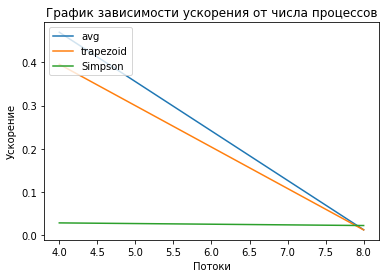

In [4]:
import numpy as np
import matplotlib.pyplot as plt

boost_u2_1 = [0.46988,
0.01249
]
boost_u3_2 = [0.39572,
0.01214
]
boost_u3_3 = [0.0284,
0.0223
]
x = [4, 8]

methods = ["avg", "trapezoid", "Simpson"]

plt.plot(x, boost_u2_1, x, boost_u3_2, x, boost_u3_3)
plt.title('График зависимости ускорения от числа процессов')
plt.legend(methods,loc='upper left')
plt.ylabel('Ускорение')
plt.xlabel('Потоки')
plt.show()